In [62]:
df = pd.read_csv('medical_examination.csv')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [63]:
"""Add 'overweight' column column to the data. To determine if a person is overweight,
first calculate their BMI by dividing their weight in kilograms by the square of their height in meters.
If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight."""

def overweight(c):
    if (c['weight'] / (c['height']/100)**2) > 25:
        return 1
    else:
        return 0

df['overweight'] = df.apply(overweight, axis=1)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [64]:
"""Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1,
make the value 0. If the value is more than 1, make the value 1."""
def cholesterol_normalizer(c):
    if c['cholesterol'] == 1:
        return 0
    else:
        return 1
    
def gluc_normalizer(c):
    if c['gluc'] == 1:
        return 0
    else:
        return 1

df['cholesterol'] = df.apply(cholesterol_normalizer, axis=1)
df['gluc'] = df.apply(gluc_normalizer, axis=1)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [65]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active',
    # and 'overweight'.
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the
    # collumns for the catplot to work correctly.
    # df_cat = df_cat.groupby(by=['cardio'], )

    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(data=df_cat, kind='count', x='variable', hue='value', col='cardio')
    fig.set_axis_labels("variable", "total")
    
    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

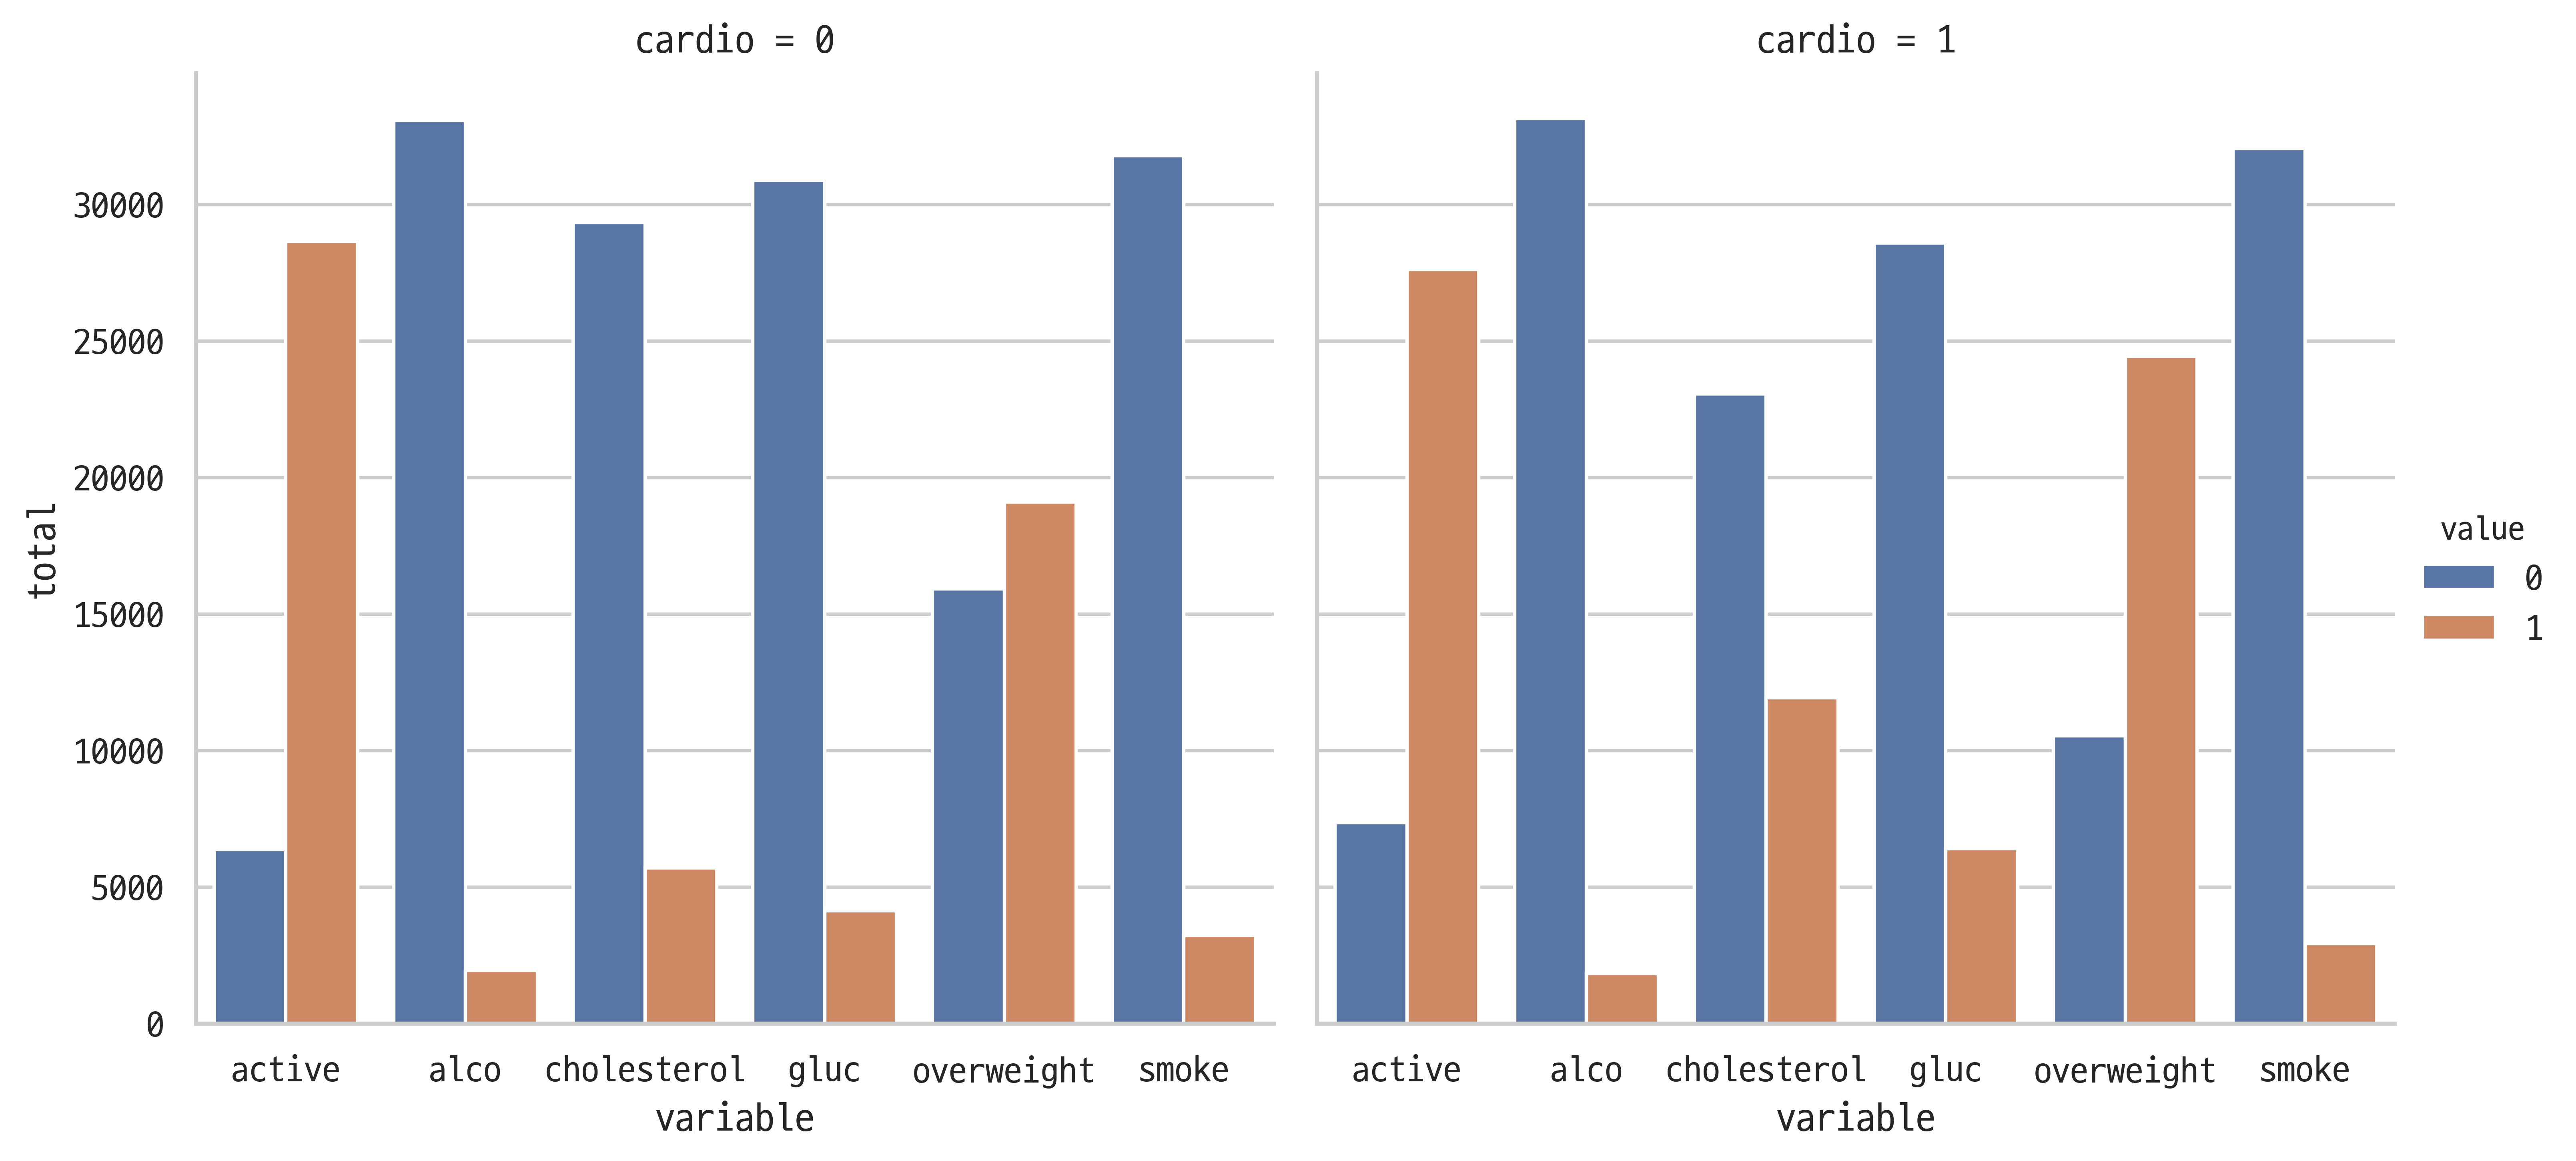

In [66]:
draw_cat_plot()

In [69]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data. Filter out the following patient segments that represent incorrect data:
    # - diastolic pressure is higher then systolic (Keep the correct data with df['ap_lo'] <= df['ap_hi']
    # - height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
    # - height is more than the 97.5th percentile
    # - weight is less then the 2.5th percentile
    # - weight is more than the 97.5th percentile
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
                 (df['height'] >= df['height'].quantile(0.025)) & 
                 (df['height'] <= df['height'].quantile(0.975)) & 
                 (df['weight'] >= df['weight'].quantile(0.025)) & 
                 (df['weight'] <= df['weight'].quantile(0.975))]
    
    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(corr)

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(8,8))

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(data=corr, vmin = -0.16, vmax = 0.32, center = 0, annot=True, fmt='.1f', linewidth= 0.5, 
                cbar_kws = {'shrink': .45, 'format': '%.2f'}, square=True, mask=mask)

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

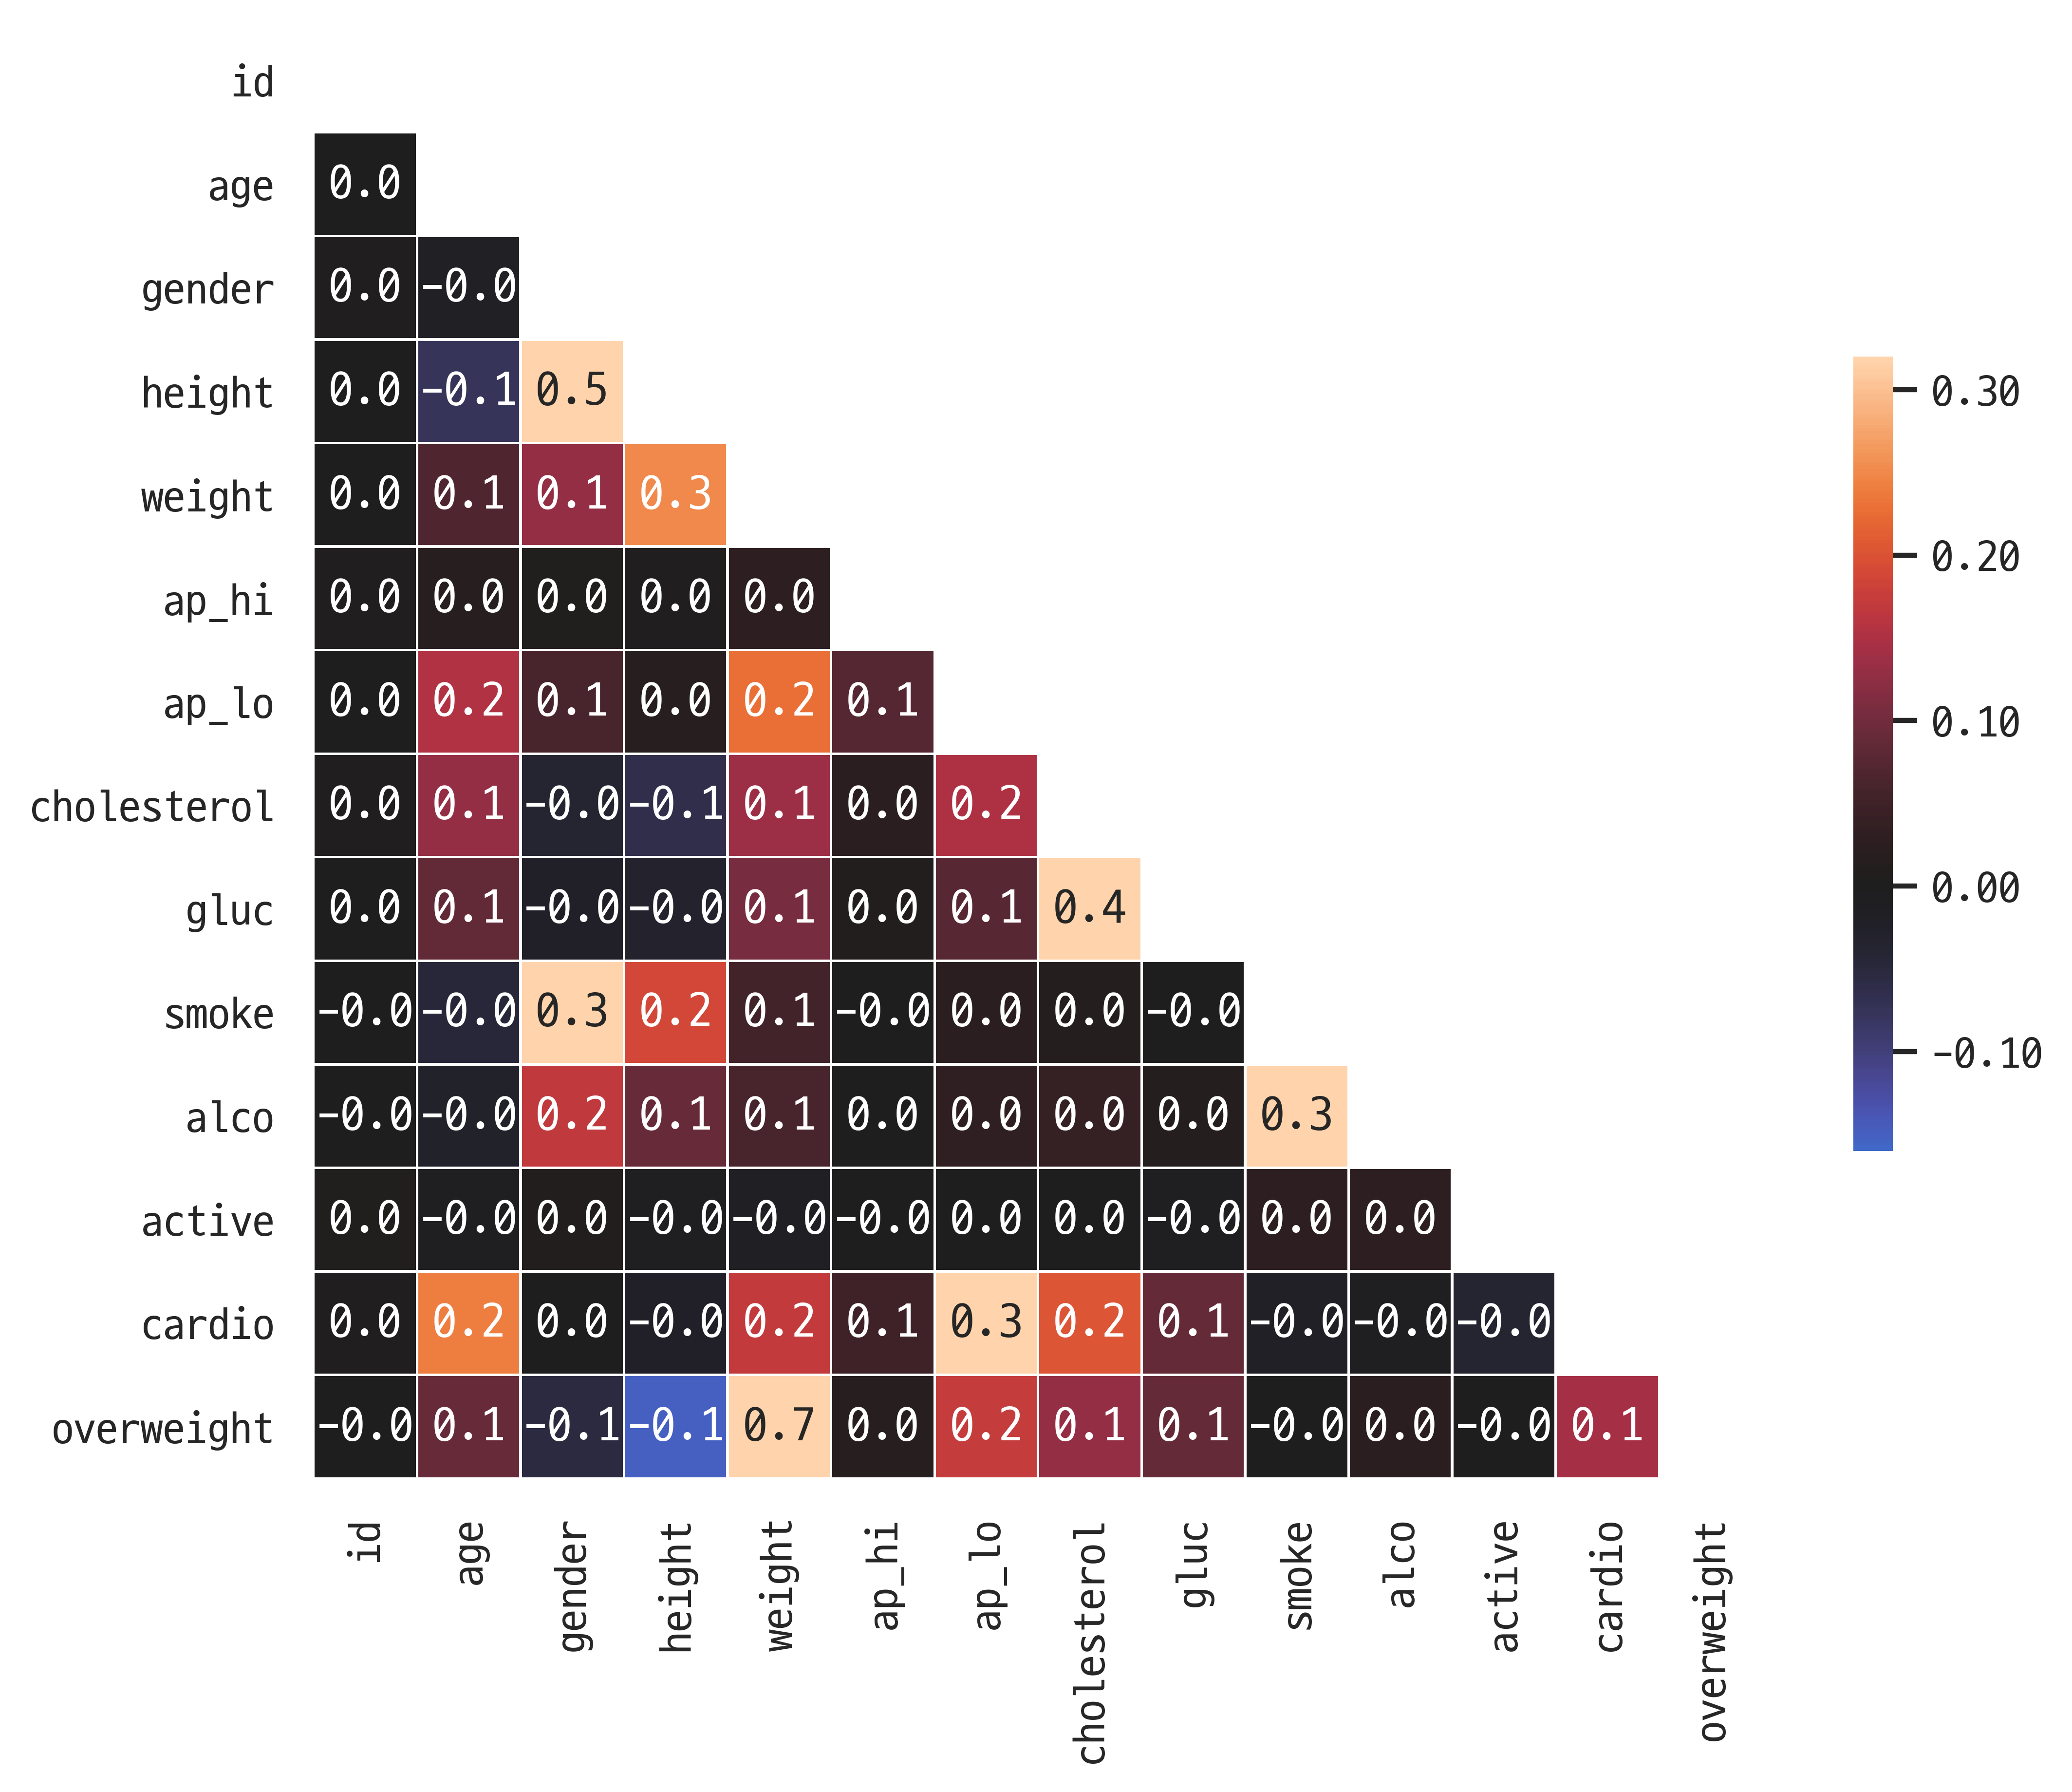

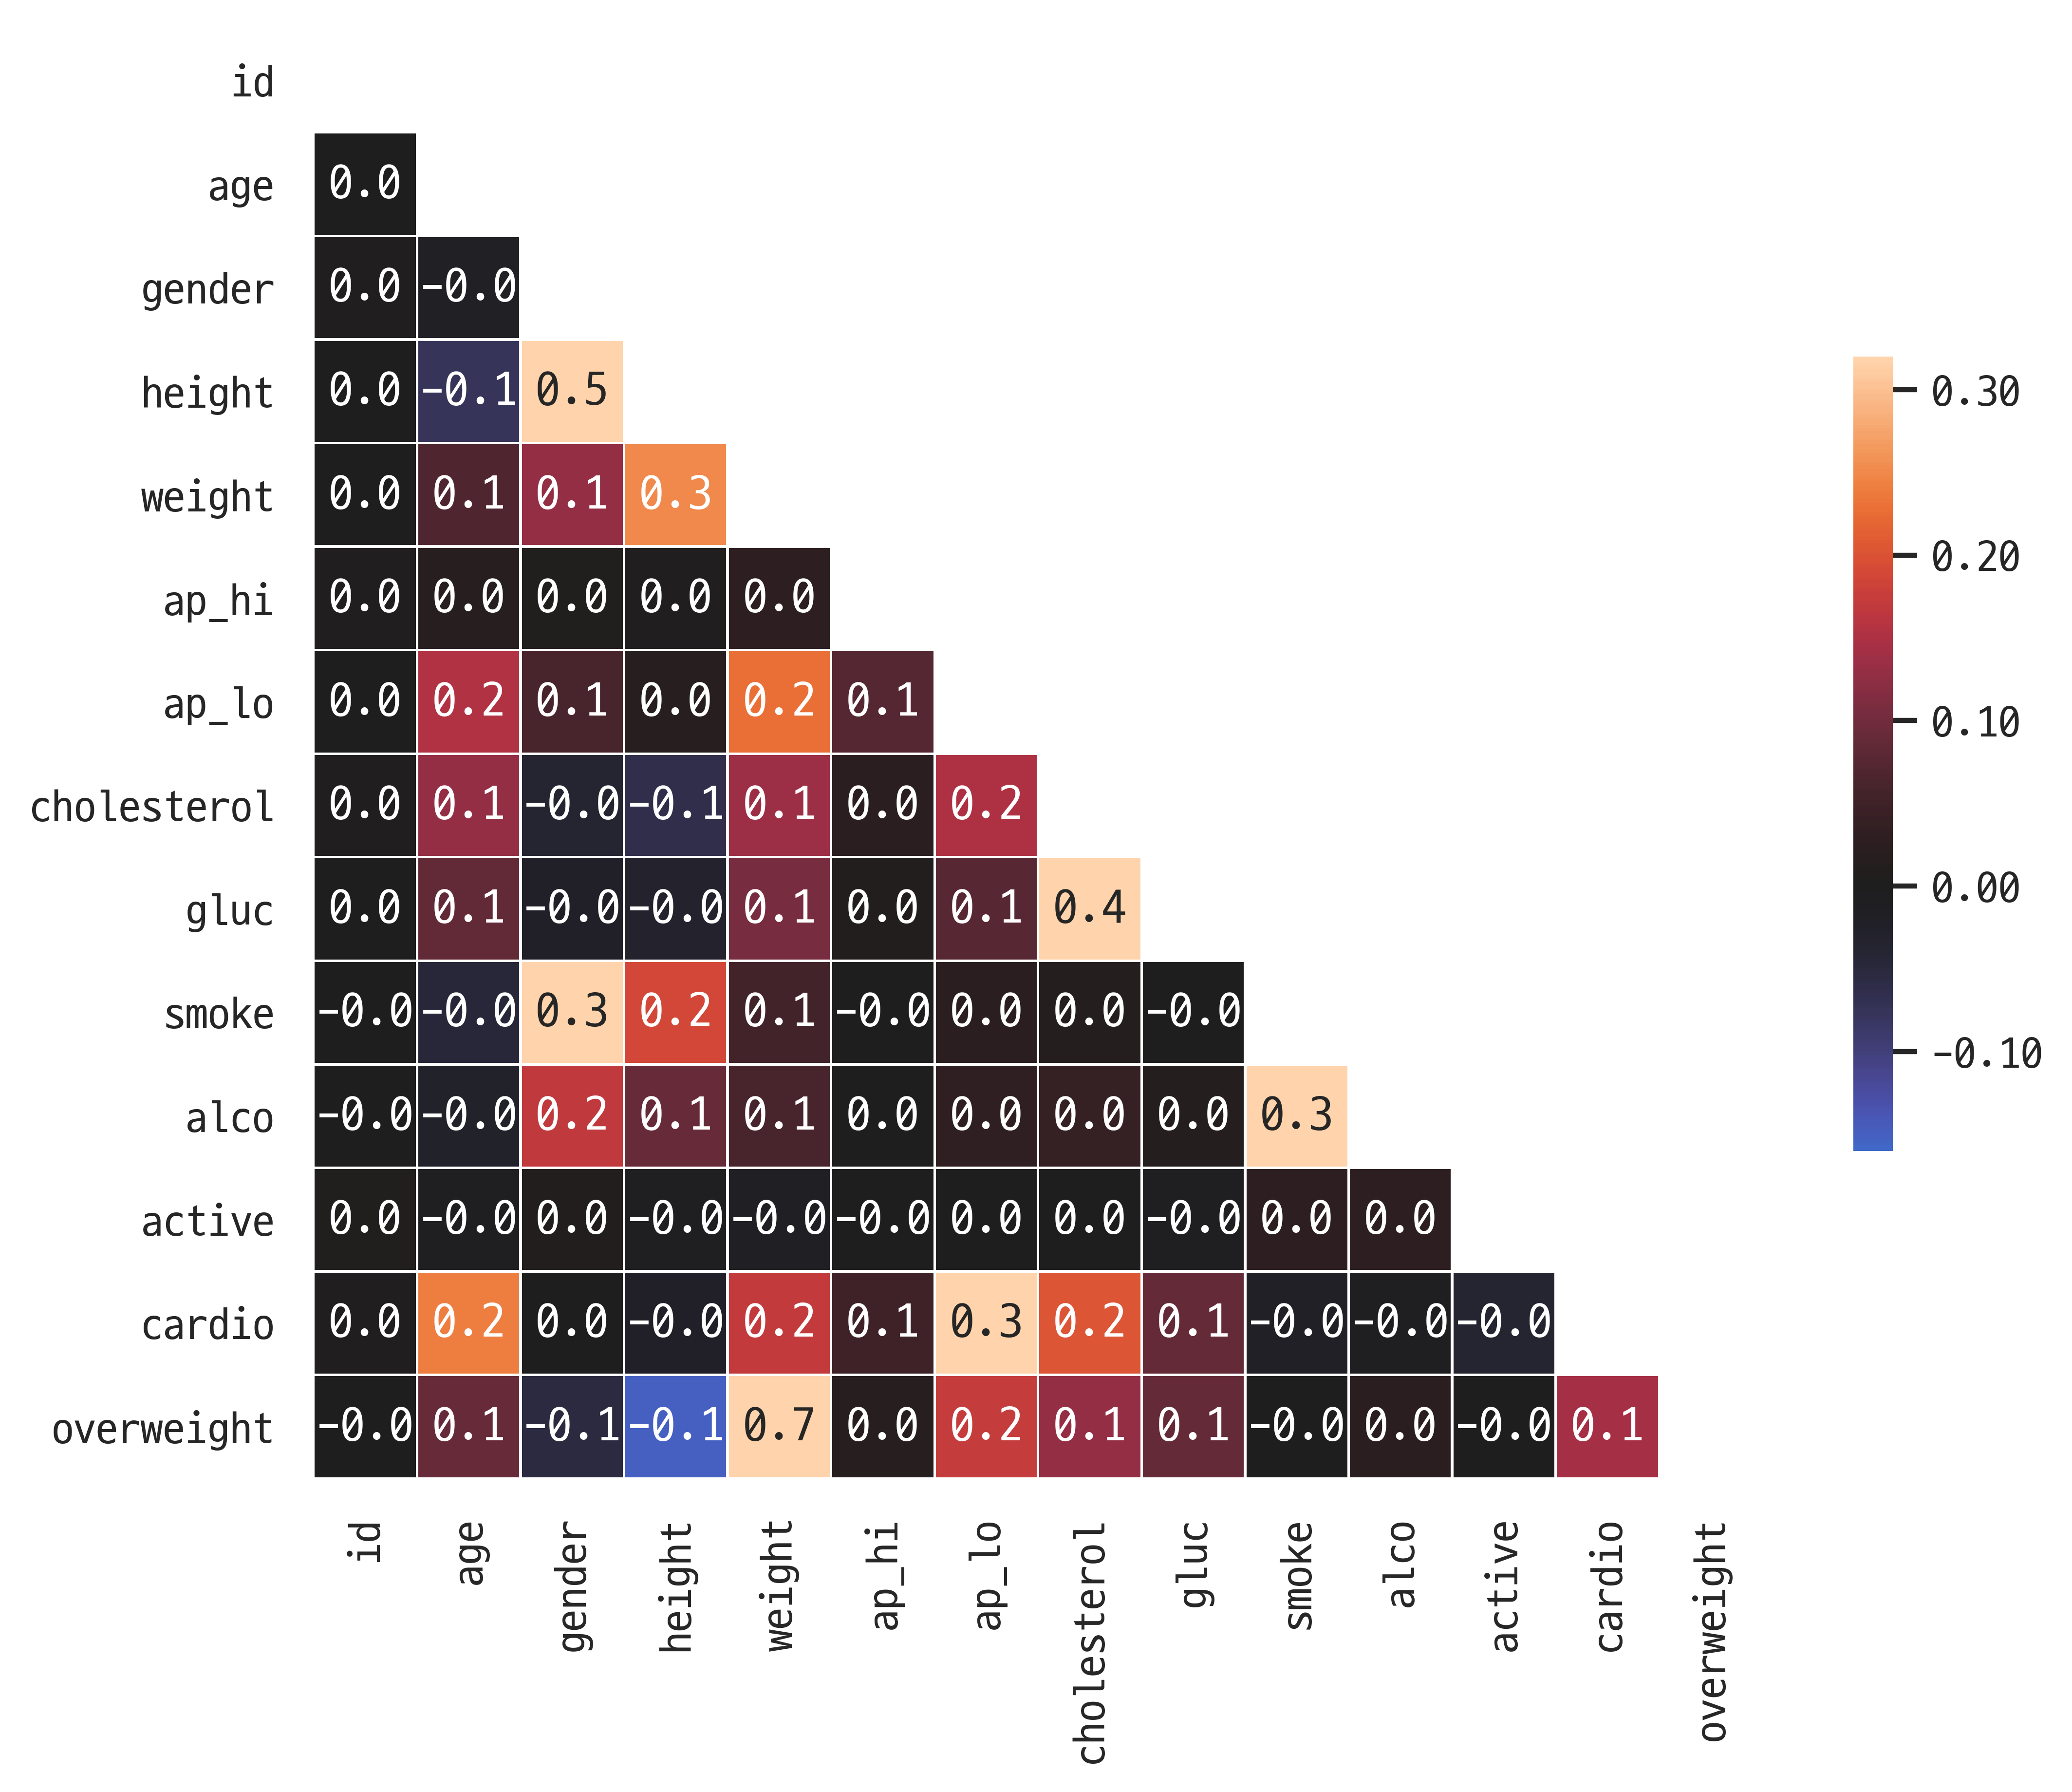

In [70]:
draw_heat_map()